# CSE 152A Winter 2025 – Assignment 4

- Assignment Published On: **Monday, March 3, 2025**

- Due On: **Thursday, March 13, 2025 11:59 PM (Pacific Time)**

## Instructions

Please answer the questions below using Python in the attached Jupyter notebook and follow the guidelines below:
 
- This assignment must be completed **individually**. For more details, please follow the Academic Integrity Policy and Collaboration Policy posted on lecture slides.

- All the solutions must be written in this Jupyter notebook.

- After finishing the assignment in the notebook, please export the notebook as a PDF and submit both the notebook and the PDF (i.e. the `.ipynb` and the `.pdf` files) on Gradescope. (Note: Please ensure that all images/plots are clear in the pdf).

- You may use basic algebra packages (e.g. `NumPy`, `SciPy`, etc) but you are not allowed to use open source codes that directly solve the problems. Feel free to ask the instructor and the teaching assistants if you are unsure about the packages to use.

- It is highly recommended that you begin working on this assignment early.

- Make sure that you read hints for questions (wherever given).

**Late Policy:** Assignments submitted late will receive a 25% grade reduction for each 12 hours late (that is, 50% per day).

## Submission Instructions

- You must submit both the `.ipynb` file and a `.pdf` version of your notebook.

- Some methods to generate PDF
    -  File -> Save and Export Notebook As -> `.html` -> Print -> Save as PDF
    -  Using [nbconvert](https://nbconvert.readthedocs.io/en/latest/)


- We will be grading primarily from your notebook.
    - It is your responsibility to make sure that your code and outputs are visible.
 
## Virtual Environment

### Initial Set-up
You can utilize a virtual environment (`venv`) in order to manage dependencies: [venv link](https://docs.python.org/3/library/venv.html) along with the libraries specified in `requirements.txt`.

To create the environment:
```
python -m venv cse152a_hw4
```

To activate the environment (Mac/Linux):
```
source ./cse152a_hw4/bin/activate
```

To activate the environment (Windows):
```
.\cse152a_hw4\Scripts\activate
```

Once the virtual environment is activated, you can install the libraries according to `requirements.txt` like so:
```
pip install -r requirements.txt
```

You should then add the environment to jupyter notebook like so:
```
python -m ipykernel install --user --name=cse152a_hw4
```

To deactivate the environment, simply:
```
deactivate
```

This assumes you have Python installed already.

### Using the venv
Once you've installed all the requirements within the venv, you can deactivate and would no longer need to repeat the above steps. You can simply open a Jupyter instance.

Opening a Jupyter instance:
```
jupyter-lab
```

Ensure that you select the correct kernel (named `cse152a_hw4` if you followed the steps above) by clicking Kernel -> Change Kernel.

# 1. Backpropogation [10 Points]

We will study the backpropagation behavior for a  [softplus neuron](https://en.wikipedia.org/wiki/Softplus), given by:

$$
f(z) = ln\ (1+e^z)
$$

Consider a two-dimensional input given by $x = (x_1, x_2)^T$. A weight vector $w = (w_1, w_2)^T$ and a bias $b$ act on it. Thus, the output of a neuron is given by $f(x_1, x_2) = ln(1+e^{w_1x_1+w_2x_2+b})$.
\
\
(a.) Draw the computational graph for the neuron in terms of elementary operations (addition, subtraction, multiplication, division, exponentiation) as seen in class. **[2 points]**

(b.) Consider inputs $x_1 = 0.5, x_2=1.2,$ weights $w_1 = 0.2, w_2 = 0.8$ and bias $b = -0.1$. In the same figure, show the values at each node of the graph during forward propagation. **[2 points]**

(c.) Use backpropagation to determine the gradients $\frac{\partial f}{\partial w_1}, \frac{\partial f}{\partial w_2}, \frac{\partial f}{\partial b}$. Also illustrate in the same figure the intermediate gradients at each node of the computation graph. **[4 points]**

(d.) Explain the process of backpropagation you used to compute partial derivatives. **[2 points]**

![title](computational_graph.png)

I used backpropagation as shown in the math expressions below. 
The forward pass values are above the backpropagated values in the computational graph.

\begin{align*}
    \frac{df}{df} &= 1 \\
    \frac{df}{d(1+e^z)} = \frac{1}{1+e^z} &= 0.277 \\
    \frac{df}{de^z} = \frac{df}{d(1+e^z)} &= 0.277 \\
    \frac{df}{dz} =  \frac{df}{de^z}\cdot \frac{de^z}{dz} = 0.277\cdot e^{0.96} &= 0.723 \\
    \frac{df}{db} = \frac{df}{dz}\cdot \frac{dz}{db} &= 0.723 \\
    \frac{df}{dw_1} = \frac{df}{dz}\cdot \frac{dz}{dw_1} = 0.723\cdot 0.5 &= 0.3615 \\
    \frac{df}{dw_2} = \frac{df}{dz}\cdot \frac{dz}{dw_2} = 0.723\cdot 1.2 &= 0.8676 \\
\end{align*}


# 2. Training a small CNN for FashionMNIST image classification [15 Points]

In this problem, you will train a small convolutional neural network for image classification, using PyTorch. We will use the FashionMNIST dataset for image classification (https://github.com/zalandoresearch/fashion-mnist)

In [1]:
import numpy as np
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torch.utils.data import DataLoader
from torchvision import datasets
from torchvision.transforms import ToTensor
import matplotlib.pyplot as plt
from tqdm import tqdm
import pickle

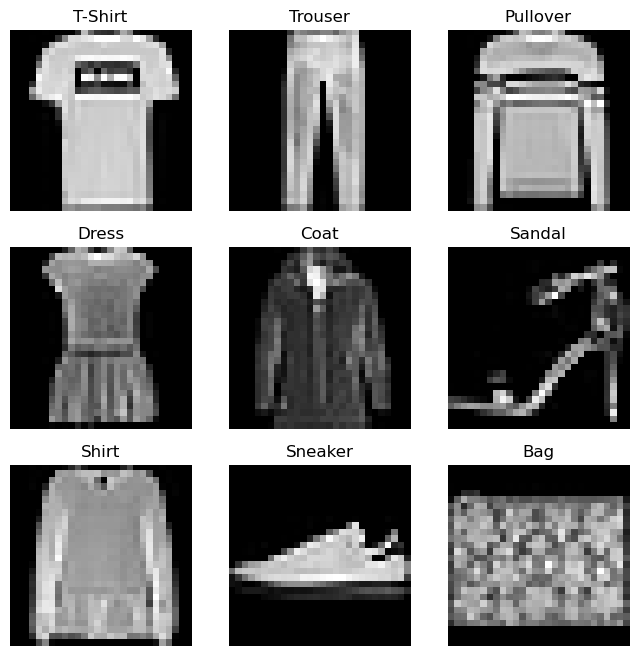

Image Shape: torch.Size([1, 28, 28])


In [2]:
# Load in the datasets

# Download the FashionMNIST Datasets (you will use these variables later on)
FashionMNIST_train = datasets.FashionMNIST(
    root="data",
    train=True,
    download=True,
    transform=ToTensor()
)

FashionMNIST_test = datasets.FashionMNIST(
    root="data",
    train=False,
    download=True,
    transform=ToTensor()
)

# Code adapted from PyTorch https://pytorch.org/tutorials/beginner/basics/data_tutorial.html
labels_map = {
    0: "T-Shirt",
    1: "Trouser",
    2: "Pullover",
    3: "Dress",
    4: "Coat",
    5: "Sandal",
    6: "Shirt",
    7: "Sneaker",
    8: "Bag",
    9: "Ankle Boot",
}

figure = plt.figure(figsize=(8, 8))
cols, rows = 3, 3
train_labels = FashionMNIST_train.targets
label = (train_labels == 0).nonzero()
for i in range(1, cols * rows + 1):
    # Select image of each label
    indices = (train_labels == i-1).nonzero()
    sample_idx = indices[0,0]
    img, label = FashionMNIST_train[sample_idx]
    figure.add_subplot(rows, cols, i)
    plt.title(labels_map[label])
    plt.axis("off")
    plt.imshow(img.squeeze(), cmap="gray")
plt.show()

print(f"Image Shape: {img.shape}")

In [3]:
# Check device
if torch.cuda.is_available():
    device = "cuda"
else:
    device = "cpu"

print(f"Using {device} device")

Using cuda device


**[ 3 points ] Define the network structure as follows**

* Convolutional layer with 32 kernels, window size 5, padding size 2, stride 1
* ReLU activation layer
* Max pooling layer with window size 2, stride 2
* Convolutional layer with 64 kernels, window size 5, padding size 2, stride 1
* ReLU activation layer
* Max pooling layer with window size 2, stride 2
* Fully connected layer with 1024 output channels
* ReLU activation layer
* Dropout layer with drop rate 0.4
* Fully connected layer with 10 output channels

In [11]:
class Net(nn.Module):
    def __init__(self,drop):
        super(Net, self).__init__()
        self.drop = drop
        # DEFINE THE NETWORK STRUCTURE

        # Example: self.conv1 = nn.Conv2d(1, 3, 5,stride=1,padding=2,bias=True)
        # You can look at the main PyTorch tutorial for reference
        # https://pytorch.org/tutorials/beginner/basics/buildmodel_tutorial.html

        # --------------- YOUR CODE HERE ---------------
        self.conv1 = nn.Conv2d(in_channels=1, out_channels=32, kernel_size=5, stride=1, padding=2)
        self.relu = nn.ReLU()
        self.pool = nn.MaxPool2d(kernel_size=2, stride=2)
        self.conv2 = nn.Conv2d(in_channels=32, out_channels=64, kernel_size=5, stride=1, padding=2)
        self.fc1 = nn.Linear(64*7*7, 1024)
        self.dropout = nn.Dropout(p=0.4)
        self.fc2 = nn.Linear(1024, 10)


    def forward(self, x):

        # --------------- YOUR CODE HERE ---------------
        x = self.pool(self.relu(self.conv1(x)))
        x = self.pool(self.relu(self.conv2(x)))
        x = torch.flatten(x, start_dim=1)
        x = self.relu(self.fc1(x))
        if self.drop:
            x = self.dropout(x)
        x = self.fc2(x)
        return x

# Print net
net = Net(drop=True).to(device)
print(net)

Net(
  (conv1): Conv2d(1, 32, kernel_size=(5, 5), stride=(1, 1), padding=(2, 2))
  (relu): ReLU()
  (pool): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (conv2): Conv2d(32, 64, kernel_size=(5, 5), stride=(1, 1), padding=(2, 2))
  (fc1): Linear(in_features=3136, out_features=1024, bias=True)
  (dropout): Dropout(p=0.4, inplace=False)
  (fc2): Linear(in_features=1024, out_features=10, bias=True)
)


**[ 5 points ] Complete the train function below. Use the same parameters to perform training in each of the following setups:**

* SGD for optimization, without dropout
* SGD for optimization, with dropout
* Adam for optimization, without dropout
* Adam for optimization, with dropout.

As evaluation for each case above, perform the following:
* Plot the loss graph and the accuracy graph of each batch on training set, and plot them on the same plot
* Print the accuracy on test set after training

Test accuracies are expected to be relatively high (~85 %) for all networks.

Training can take a few minutes.

In [16]:
# CODE BELOW IS AN EXAMPLE STARTER
# FEEL FREE TO EDIT ANYTHING

# 'to_train' is a parameter that determines what part of the net to train.
# It is not required for this question, but will be useful in the next one.
# You should also change the parameters: epochs, batch, and learning rate as necessary.
# You may need to tune these hyperparameters.
def train(train_dataset, net, to_train, opt, epochs=10, batch=200, learning_rate=1e-3):
    # Initialize loss
    criterion = nn.CrossEntropyLoss()
    losslist = []
    acclist=[]

    # Create dataloader
    MNIST_train_dataloader = DataLoader(train_dataset, batch_size=batch, shuffle=True)

    # Select optimizer
    if(opt=='adam'):
        optimizer = optim.Adam(to_train,lr=learning_rate)
    else:
        optimizer = optim.SGD(to_train,lr=learning_rate,momentum = 0.99)
    optimizer.zero_grad()

    # Set model to training mode
    net.train()
    for k in tqdm(range(epochs)):
        for it, (X,y) in enumerate(MNIST_train_dataloader):
            # Send to device
            X, y = X.to(device), y.to(device)

            # Train the model using the optimizer and the batch data.
            # Append the loss and accuracy from each iteration to the losslist and acclist arrays
            # --------------- YOUR CODE HERE ---------------
            logits = net(X)
            prediction = torch.argmax(logits, dim=1)

            accuracy = (prediction == y).float().mean()
            loss = criterion(logits, y)
            
            optimizer.zero_grad()
            loss.backward()
            optimizer.step()
            

            losslist.append(loss.item())
            acclist.append(accuracy.item())



    return losslist,acclist

# Used to test or evaluate your network. Already written for you.
def test(test_dataset, net):
    batch = 200
    test_dataloader = DataLoader(test_dataset, batch_size=batch)
    size = len(test_dataloader.dataset)

    # Set model to eval mode
    net.eval()

    test_loss, correct = 0, 0
    with torch.no_grad():
        for X, y in test_dataloader:
            # Send to device
            X, y = X.to(device), y.to(device)

            # Prediction
            pred = net(X)

            # Calculate number of correct predictions in the batch
            correct += (pred.argmax(1) == y).type(torch.float).sum().item()

    # Compute total accuracy
    acc = correct / size
    return acc

100%|██████████| 10/10 [01:08<00:00,  6.88s/it]


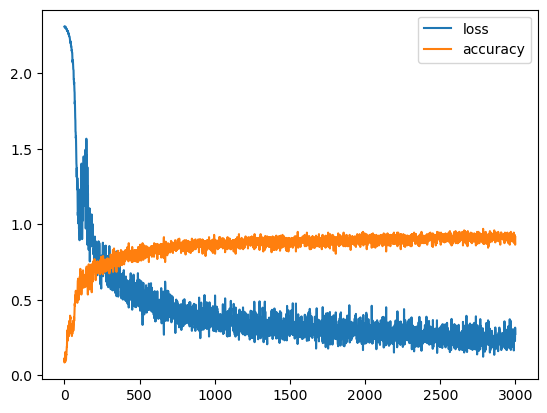

Accuracy:0.8876


In [17]:
# SGD with no dropout
# Example code
net = Net(drop=False).to(device)
loss1, acc1 = train(FashionMNIST_train, net, net.parameters(), 'sgd')
ax=range(len(loss1))
plt.plot(ax, loss1, ax, acc1)
plt.legend(['loss', 'accuracy'])
plt.show()
print('Accuracy:{}'.format(test(FashionMNIST_test, net)))

100%|██████████| 10/10 [01:06<00:00,  6.65s/it]


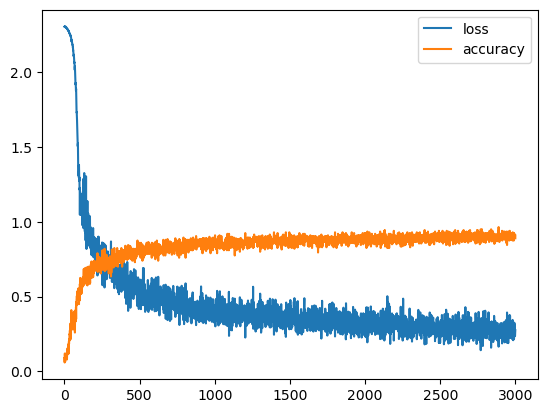

Accuracy:0.8957


In [21]:
# SGD with dropout
# --------------- YOUR CODE HERE ---------------
net = Net(drop=True).to(device)
loss2, acc2 = train(FashionMNIST_train, net, net.parameters(), 'sgd')
ax=range(len(loss2))
plt.plot(ax, loss2, ax, acc2)
plt.legend(['loss', 'accuracy'])
plt.show()
print('Accuracy:{}'.format(test(FashionMNIST_test, net)))

100%|██████████| 10/10 [01:07<00:00,  6.79s/it]


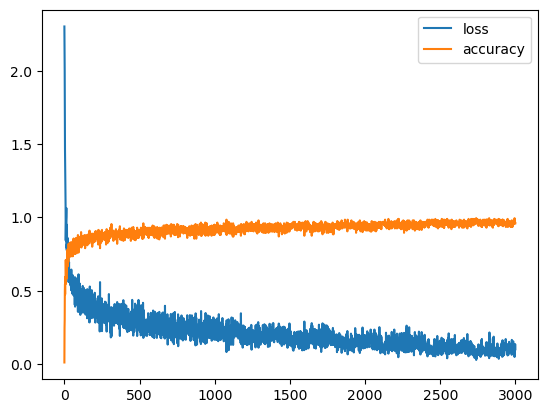

Accuracy:0.9199


In [22]:
# Adam with no dropout
# --------------- YOUR CODE HERE ---------------
net = Net(drop=False).to(device)
loss3, acc3 = train(FashionMNIST_train, net, net.parameters(), 'adam')
ax=range(len(loss3))
plt.plot(ax, loss3, ax, acc3)
plt.legend(['loss', 'accuracy'])
plt.show()
print('Accuracy:{}'.format(test(FashionMNIST_test, net)))

100%|██████████| 10/10 [01:08<00:00,  6.83s/it]


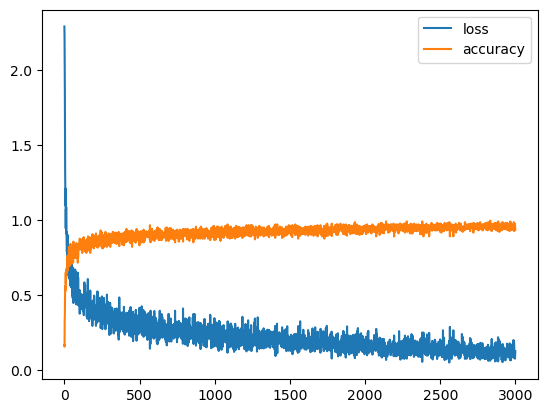

Accuracy:0.9237


In [23]:
# Adam with dropout
# --------------- YOUR CODE HERE ---------------
net = Net(drop=True).to(device)
loss4, acc4 = train(FashionMNIST_train, net, net.parameters(), 'adam')
ax=range(len(loss4))
plt.plot(ax, loss4, ax, acc4)
plt.legend(['loss', 'accuracy'])
plt.show()
print('Accuracy:{}'.format(test(FashionMNIST_test, net)))

**[ 5 points ] Plot the following graphs and note your observations**

* Training loss graphs of SGD−dropout and Adam−dropout on the same plot.
* Training loss graphs for Adam-dropout for 3 different values of batch sizes of 10, 200 and 500, on the same plot.

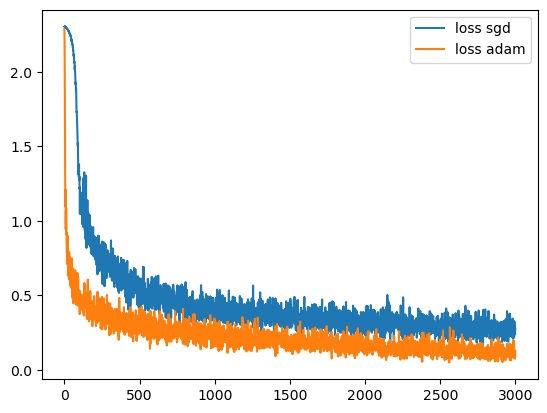

In [24]:
# --------------- YOUR CODE HERE ---------------

plt.plot(ax, loss2, ax, loss4)
plt.legend(['loss sgd', 'loss adam'])
plt.show()

It appears adam performs better than sgd.

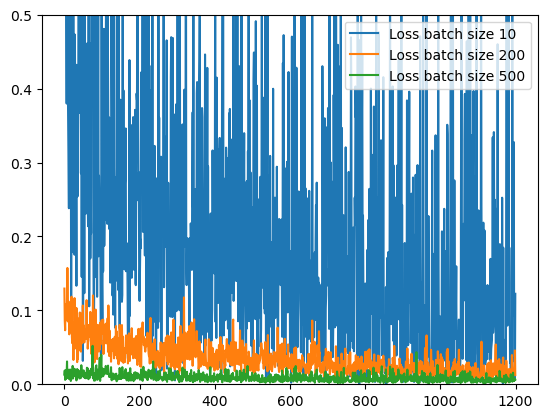

In [ ]:
# Adam with dropout for different batch sizes
# --------------- YOUR CODE HERE ---------------
net = Net(drop=True).to(device)
loss4_10, acc4_10 = train(FashionMNIST_train, net, net.parameters(), 'adam', batch=10)
loss4_200, acc4_200 = train(FashionMNIST_train, net, net.parameters(), 'adam', batch=200)
loss4_500, acc4_500 = train(FashionMNIST_train, net, net.parameters(), 'adam', batch=500)
# Find the minimum length of all loss lists
min_length = min(len(loss4_10), len(loss4_200), len(loss4_500))

# Create new evenly spaced indices for interpolation
new_x = np.linspace(0, 1, min_length)

# Interpolate each loss list to the new length
loss4_10_scaled = np.interp(new_x, np.linspace(0, 1, len(loss4_10)), loss4_10)
loss4_200_scaled = np.interp(new_x, np.linspace(0, 1, len(loss4_200)), loss4_200)
loss4_500_scaled = np.interp(new_x, np.linspace(0, 1, len(loss4_500)), loss4_500)

# Plot the rescaled losses
plt.plot(range(min_length), loss4_10_scaled, label='Loss batch size 10')
plt.plot(range(min_length), loss4_200_scaled, label='Loss batch size 200')
plt.plot(range(min_length), loss4_500_scaled, label='Loss batch size 500')
plt.ylim(0, 0.5)
plt.legend()
plt.show()

It appears larger batch sizes performed better.

**[ 2 points ] The learning rate is a key hyperparameter during training. For this question, do the following.**

1. [ 1 point ] Train three models for three different values of the learning rate hyperparameter. Plot the loss graphs for training with these values of the learning rate on the same plot. Make sure that you change the hyperparameter enough such that there is a clear difference in the graphs and comment on the differences. Use SGD optimizer and no dropout.

2. [ 1 point ] Repeat the above task, but this time, use dropout with SGD optimizer. Note down your observations.

In [31]:
# sgd without dropout for different learning rates
# --------------- YOUR CODE HERE ---------------
net = Net(drop=False).to(device)
loss1_2, _ = train(FashionMNIST_train, net, net.parameters(), 'sgd', learning_rate=1e-2)
loss1_3, _ = train(FashionMNIST_train, net, net.parameters(), 'sgd', learning_rate=1e-3)
loss1_4, _ = train(FashionMNIST_train, net, net.parameters(), 'sgd', learning_rate=1e-4)

100%|██████████| 10/10 [01:10<00:00,  7.05s/it]


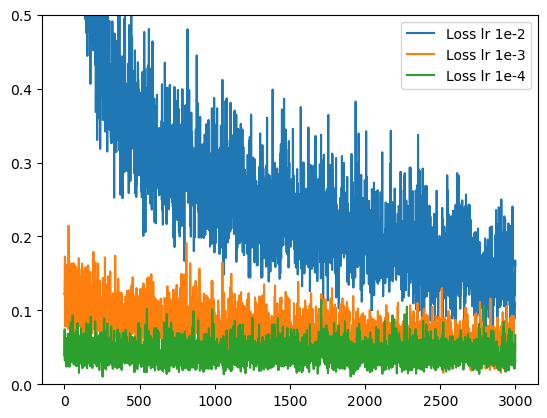

In [33]:
# Find the minimum length of all loss lists
min_length = min(len(loss1_2), len(loss1_3), len(loss1_4))

# Create new evenly spaced indices for interpolation
new_x = np.linspace(0, 1, min_length)

# Interpolate each loss list to the new length
loss1_2_scaled = np.interp(new_x, np.linspace(0, 1, len(loss1_2)), loss1_2)
loss1_3_scaled = np.interp(new_x, np.linspace(0, 1, len(loss1_3)), loss1_3)
loss1_4_scaled = np.interp(new_x, np.linspace(0, 1, len(loss1_4)), loss1_4)

# Plot the rescaled losses
plt.plot(range(min_length), loss1_2_scaled, label='Loss lr 1e-2')
plt.plot(range(min_length), loss1_3_scaled, label='Loss lr 1e-3')
plt.plot(range(min_length), loss1_4_scaled, label='Loss lr 1e-4')
plt.ylim(0, 0.5)
plt.legend()
plt.show()

It appears lower LR performed better for the learning rates we tested.

In [34]:
# sgd with dropout for different learning rates
# --------------- YOUR CODE HERE ---------------
net = Net(drop=True).to(device)
loss2_2, _ = train(FashionMNIST_train, net, net.parameters(), 'sgd', learning_rate=1e-2)
loss2_3, _ = train(FashionMNIST_train, net, net.parameters(), 'sgd', learning_rate=1e-3)
loss2_4, _ = train(FashionMNIST_train, net, net.parameters(), 'sgd', learning_rate=1e-4)

100%|██████████| 10/10 [01:09<00:00,  6.94s/it]


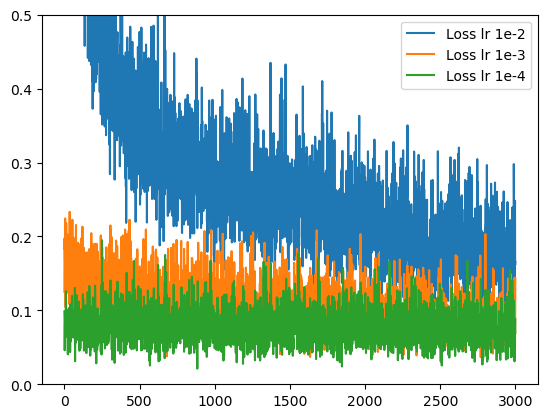

In [35]:
# Find the minimum length of all loss lists
min_length = min(len(loss2_2), len(loss2_3), len(loss2_4))

# Create new evenly spaced indices for interpolation
new_x = np.linspace(0, 1, min_length)

# Interpolate each loss list to the new length
loss2_2_scaled = np.interp(new_x, np.linspace(0, 1, len(loss2_2)), loss2_2)
loss2_3_scaled = np.interp(new_x, np.linspace(0, 1, len(loss2_3)), loss2_3)
loss2_4_scaled = np.interp(new_x, np.linspace(0, 1, len(loss2_4)), loss2_4)

# Plot the rescaled losses
plt.plot(range(min_length), loss2_2_scaled, label='Loss lr 1e-2')
plt.plot(range(min_length), loss2_3_scaled, label='Loss lr 1e-3')
plt.plot(range(min_length), loss2_4_scaled, label='Loss lr 1e-4')
plt.ylim(0, 0.5)
plt.legend()
plt.show()

It appears that adding dropout did not affect the relative performance of the learning rates.

# 3. Transfer learning [15 Points]

You will now visualize the effects of transfer learning by performing experiments using the STL10 dataset (https://cs.stanford.edu/~acoates/stl10/) . Note that this is just to understand how transfer learning works, in practice it is generally used with very large datasets and complex networks.

In [ ]:
!mkdir STL10
%cd STL10
!wget -nc https://cs.stanford.edu/~acoates/stl10/stl10_matlab.tar.gz
!tar -xzf stl10_matlab.tar.gz stl10_matlab/train.mat
%cd ..

In [ ]:
# Convert .mat files to np arrays
import scipy.io as sio
import numpy as np

def load_data(path):
    data = sio.loadmat(path)
    return np.array(data['X']), np.array(data['y'])

data, labels = load_data('STL10/stl10_matlab/train.mat')

data = data.reshape((-1, 96, 96, 3), order='F').transpose(0, 3, 1, 2)
labels  = labels.reshape(-1)

 **[ 2 points ] Plot 3 random images corresponding to each label from the training data**


In [ ]:
# --------------- YOUR CODE HERE ---------------

We will split the dataset into two parts, one with labels 0-4 and other with labels 5-9, we have provided this code for you. This should print the sizes of data and labels in each split.

In [ ]:
# Split the data and labels into two sets corresponding to labels 0-4 and 5-9.
data1 = np.zeros((0, 3, 96, 96))
labels1 = []
data2 = np.zeros((0, 3, 96, 96))
labels2 = []

## SVHN has labels in the range 1-10 and not 0-9.
# Split data and labels for labels 0 to 4
for i in range(5):
    x = data[labels == i][:500]
    data1 = np.vstack((data1, x))
    labels1 += [i] * len(x)

# Split data and labels for labels 5 to 9
for i in range(5, 10):
    x = data[labels == i][:500]
    data2 = np.vstack((data2, x))
    labels2 += [i] * len(x)

## Neural networks always accept labels in the range 0 to n-1.
## change data from cardinal to ordinal.
labels1 = np.array(labels1)
labels2 = np.array(labels2) - 5

data1.shape, data2.shape, labels1.shape, labels2.shape

## should print ((2500, 3, 96, 96), (2500, 3, 96, 96), (2500,), (2500,))

**[ 3 points ] Create a simple convolutional network to classify the training data. The network structure should be as follows:**

1. Layer 1 - Convolutional layer with kernel size 4, Stride 2, Output channels 5, Relu activation
2. Layer 2 - Convolutional layer with kernel size 4, Stride 1, Output channels 10, Relu avtication
3. Layer 3 - Convolutional layer with kernel size 4, Stride 1, Output channels 20, Relu activation
4. Layer 4 - Convolutional layer with kernel size 4, Stride 1, Output channels 40, Relu activation
5. Layer 5 - Fully connected layer with 5 outputs

In [ ]:
class Net(nn.Module):
    def __init__(self, n_labels=5):
        super().__init__()
        # --------------- YOUR CODE HERE ---------------
        pass

    def forward(self, x):
        # --------------- YOUR CODE HERE ---------------
        pass

net = Net()
print(net)

**[ 5 points ] Complete the train function below and follow the instructions**

* Initialize the network, train the complete network (net.parameters) on data1 (The first 5 classes)
* Plot the loss and accuracy graphs over training on the same plot
* Print the final training accuracy as well**

Set the learning rate, number of iterations and batch size such that the loss is gradually and smoothly decreasing and converging. The accuracy at the end of training must be around or greater than 55 %.

In [ ]:
# to_train can be net.paramaters OR net.fc.parameters OR net.conv1.parameters so that only certain parts of the net are trained
def train(tdata,tlabel,net,to_train):
    criterion = nn.CrossEntropyLoss()
    losslist = []
    acclist = [] # Hint: use argmax to find the index with the largest value

    # YOU MAY NEED TO CHANGE THESE PARAMETERS TO IMPROVE ACCURACY
    epochs=15
    batch=32
    learning_rate=1e-4
    optimizer = optim.SGD(to_train,lr=learning_rate)
    optimizer.zero_grad()

    for k in tqdm(range(epochs)):
        ## Shuffle the data
        indices = np.arange(len(tdata))
        np.random.shuffle(indices)
        tdata = tdata[indices]
        tlabel = tlabel[indices]

        for l in range(int(len(tdata)/batch)):

            inputs = torch.FloatTensor(tdata[l*batch:(l+1)*batch]).to(device)
            targets = torch.LongTensor(tlabel[l*batch:(l+1)*batch]).to(device)
            # --------------- YOUR CODE HERE ---------------



    return losslist,acclist

In [ ]:
# --------------- YOUR CODE HERE ---------------

**[ 2 points ] Without reinitializing the network, train only the fully connected layer (net.fc.parameters) now on data2 (The next 5 classes)**

Do not change any hyper parameters such as learning rate or batch size. Plot the loss and accuracy and print the final values like before.

In [ ]:
# --------------- YOUR CODE HERE ---------------

**[ 3 points ] Now repeat the process in the opposite order**

* Initialize the net again, train the whole network on data2, generate the same plots as before
* Then without reinitializing the net, train only the fully connected layer on data1 and generate the plots

Do not change any hyperparameters.

In [ ]:
# --------------- YOUR CODE HERE ---------------

**[ 5 points ]**

* Plot the accuracy vs iterations for the classifers trained to classify data1, via normal learning as well as transfer learning, on the same plot
* Plot another graph for the classifiers trained to classify data2

Explain the results obtained, based on the training regimen. Comment on why transfer learning worked/didn't work.

In [ ]:
# --------------- YOUR CODE HERE ---------------

**Optional**: Create a network with more layers, pooling layers, and more filters and try to increase accuracy as much as possible. Play around with the hyperparameters to understand how they affect the training process. No need to turn in anything for this.